# $(D) \ The \ Two$-$Body \ Problem \ in \ Newtonian \ Mechanics$ 

In [141]:
%run ./Functions_Classical_TBP.ipynb
c = const.c.value
G = const.G.value
M_sun = const.M_sun.value
M_earth = const.M_earth.value
def rotate(V, θ):
    rot = np.array([[np.cos(θ), -np.sin(θ)], [np.sin(θ), np.cos(θ)]])
    return np.dot(rot, V)

## Bound cases

### Eccentricity test

a = 7.573e+05 meter, b = 2.443e+05 meter, e = 0.947
a = 1.969e+06 meter, b = 9.542e+05 meter, e = 0.875
a = 3.281e+06 meter, b = 1.969e+06 meter, e = 0.800
a = 4.708e+06 meter, b = 3.243e+06 meter, e = 0.725
a = 6.264e+06 meter, b = 4.761e+06 meter, e = 0.650
a = 7.969e+06 meter, b = 6.520e+06 meter, e = 0.575
a = 9.844e+06 meter, b = 8.525e+06 meter, e = 0.500
a = 1.192e+07 meter, b = 1.079e+07 meter, e = 0.425
a = 1.422e+07 meter, b = 1.332e+07 meter, e = 0.350
a = 1.679e+07 meter, b = 1.615e+07 meter, e = 0.275
a = 1.969e+07 meter, b = 1.929e+07 meter, e = 0.200
a = 2.297e+07 meter, b = 2.279e+07 meter, e = 0.125
a = 2.672e+07 meter, b = 2.669e+07 meter, e = 0.050
a = 3.105e+07 meter, b = 3.104e+07 meter, e = 0.025
a = 3.610e+07 meter, b = 3.591e+07 meter, e = 0.100
a = 4.206e+07 meter, b = 4.141e+07 meter, e = 0.175
a = 4.922e+07 meter, b = 4.766e+07 meter, e = 0.250
a = 5.797e+07 meter, b = 5.482e+07 meter, e = 0.325
a = 6.891e+07 meter, b = 6.316e+07 meter, e = 0.400
a = 8.297e+0

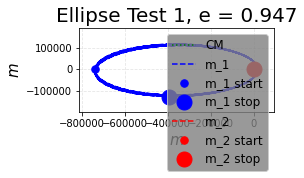

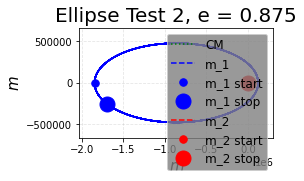

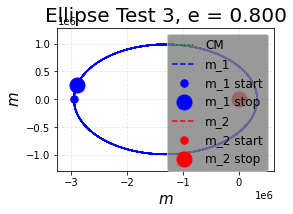

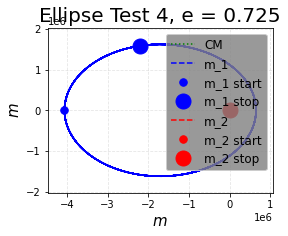

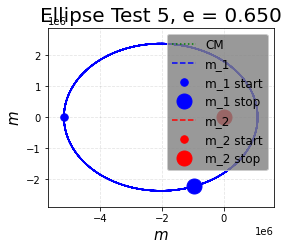

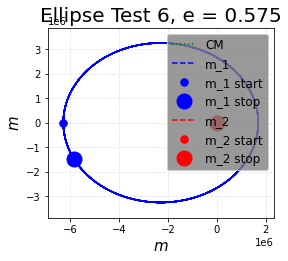

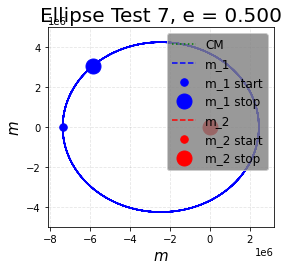

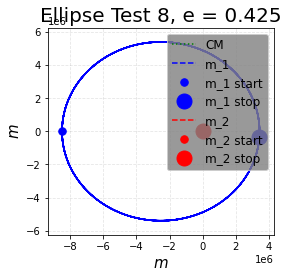

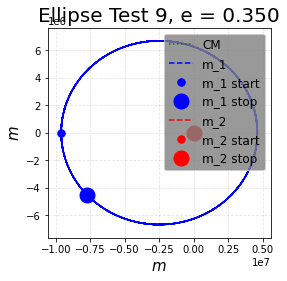

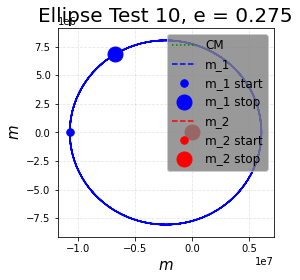

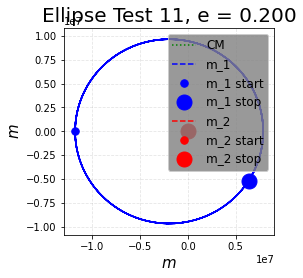

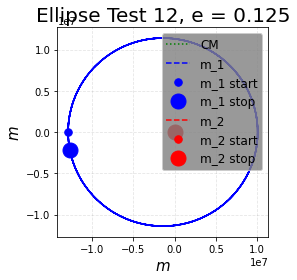

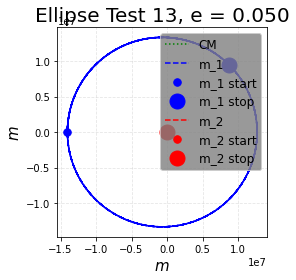

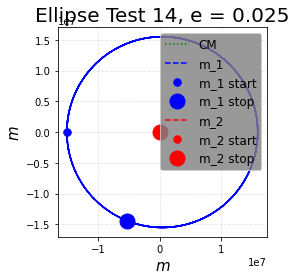

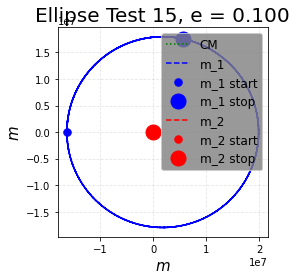

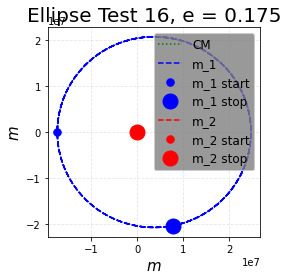

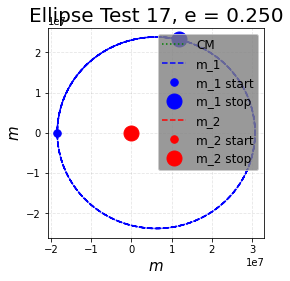

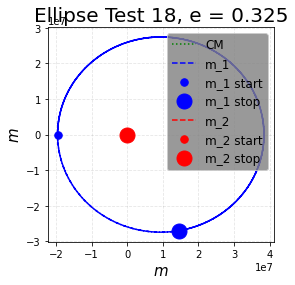

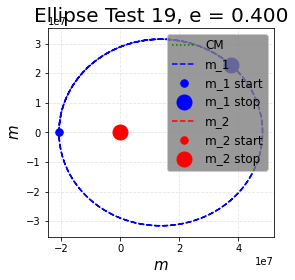

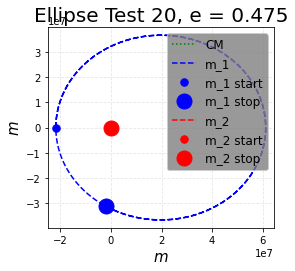

In [144]:
%run ./Functions_Classical_TBP.ipynb
N = 20
es = []
rs = []
j = 0

for i in range(0,N):
    j += 1
    m_1 = 1e-9*M_sun
    m_2 = M_sun

    R_S = 2*(m_1 + m_2)*G/c**2

    x_1 = np.array([-250*(1+ i*1.5), 0.])*R_S
    x_2 = np.array([0.,     0.])*R_S
    v_1 = np.array([0.,   0.01])*c
    v_2 = np.array([0.,     0.])*c

    s = x_1, x_2, v_1, v_2, m_1, m_2

    r_vec = x_1 - x_2
    r = np.sqrt(np.dot(r_vec, r_vec))
    t_max = 2*np.pi*np.sqrt(r**3/(G*(m_1 + m_2)))*5
    res = 1e5
    dt = t_max/res

    pos1, pos2, posCM, vel1, vel2, acc1, acc2 = twoOrbsNewt(s, t_max=t_max, dt=dt, DL=False)
    pos1_CM = (np.array([pos1]) - np.array([posCM]))[0]
    xmax, xmin, ymax, ymin = findMaxPos(pos1_CM)

    a = max(xmax - xmin, ymax - ymin)
    b = min(xmax - xmin, ymax - ymin)

    e = np.sqrt(1 - b**2/a**2)
    es.append(e)
    rs.append(r)
    print(f'a = {a:.3e} meter, b = {b:.3e} meter, e = {e:.3f}')
    twoOrbPlotter(pos1, pos2, posCM, xlim=lims, ylim=lims, CM=True, filename=f'Ellipse Test {j}, e = {e:.3f}', save=False, show=True, figsize=(4,4))

# ~ 2min

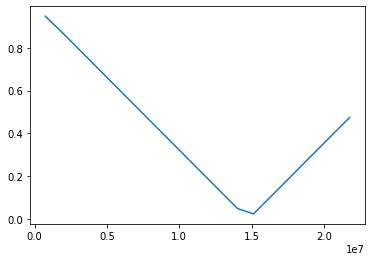

In [145]:
plt.plot(rs, es)


a = 3.281e+06 meter, b = 1.978e+06 meter, e = 0.798
a = 3.364e+06 meter, b = 2.208e+06 meter, e = 0.754
a = 3.460e+06 meter, b = 2.450e+06 meter, e = 0.706
a = 3.572e+06 meter, b = 2.704e+06 meter, e = 0.653
a = 3.701e+06 meter, b = 2.972e+06 meter, e = 0.596
a = 3.850e+06 meter, b = 3.256e+06 meter, e = 0.534
a = 4.025e+06 meter, b = 3.558e+06 meter, e = 0.467
a = 4.229e+06 meter, b = 3.882e+06 meter, e = 0.397
a = 4.470e+06 meter, b = 4.233e+06 meter, e = 0.321
a = 4.757e+06 meter, b = 4.617e+06 meter, e = 0.242
a = 5.104e+06 meter, b = 5.040e+06 meter, e = 0.157
a = 5.527e+06 meter, b = 5.514e+06 meter, e = 0.069
a = 6.054e+06 meter, b = 6.052e+06 meter, e = 0.024
a = 6.726e+06 meter, b = 6.676e+06 meter, e = 0.122
a = 7.610e+06 meter, b = 7.417e+06 meter, e = 0.224
a = 8.818e+06 meter, b = 8.324e+06 meter, e = 0.330
a = 1.057e+07 meter, b = 9.483e+06 meter, e = 0.441
a = 1.331e+07 meter, b = 1.106e+07 meter, e = 0.556
a = 1.822e+07 meter, b = 1.343e+07 meter, e = 0.676
a = 2.953e+0

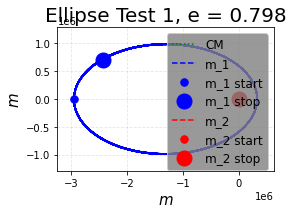

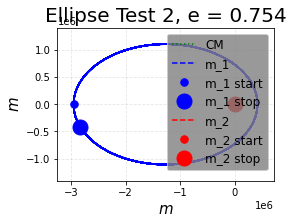

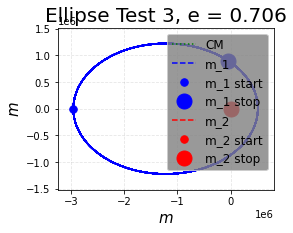

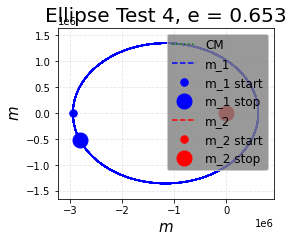

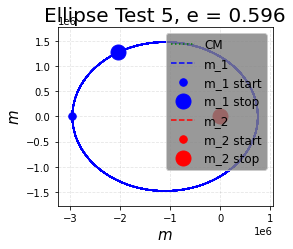

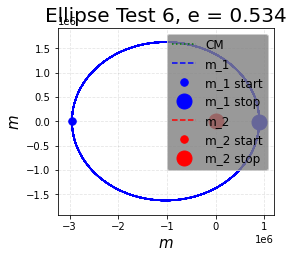

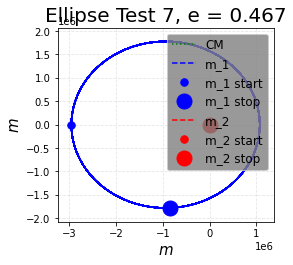

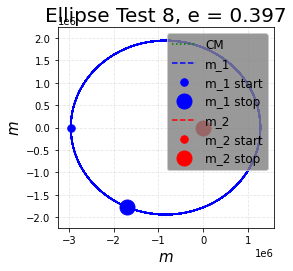

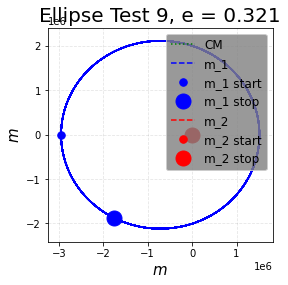

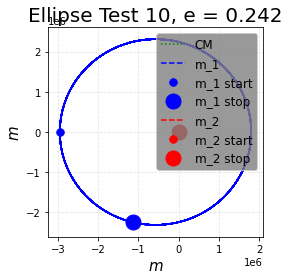

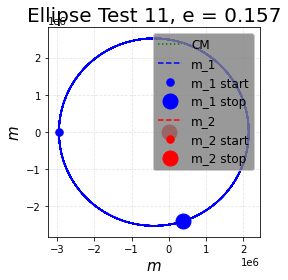

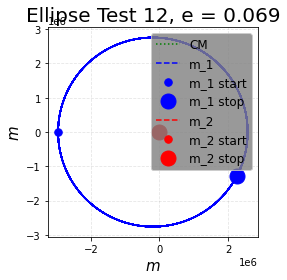

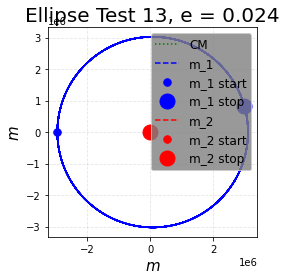

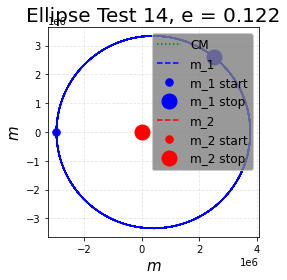

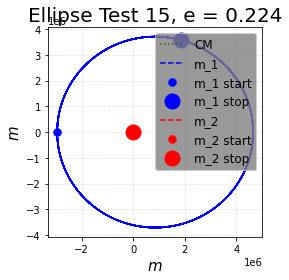

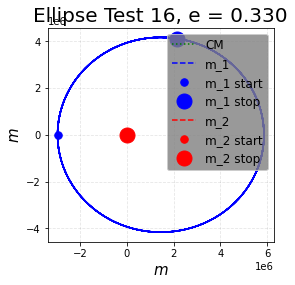

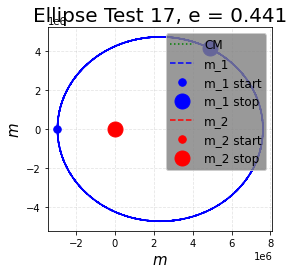

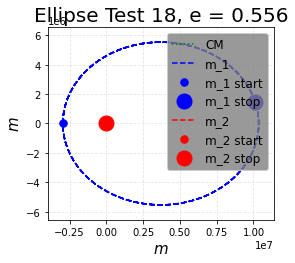

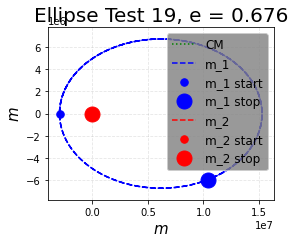

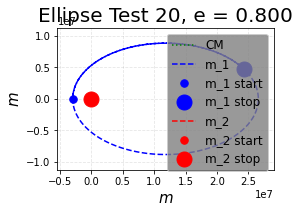

In [171]:
%run ./Functions_Classical_TBP.ipynb
N = 20
es = []
vs = np.linspace(0.01, 0.03, 20)
j = 0

for i in range(0,N):
    j += 1
    m_1 = 1e-9*M_sun
    m_2 = M_sun

    R_S = 2*(m_1 + m_2)*G/c**2

    x_1 = np.array([-1000,  0.])*R_S
    x_2 = np.array([0.,     0.])*R_S
    v_1 = np.array([0.,   vs[i]])*c
    v_2 = np.array([0.,     0.])*c

    s = x_1, x_2, v_1, v_2, m_1, m_2

    r_vec = x_1 - x_2
    r = np.sqrt(np.dot(r_vec, r_vec))
    t_max = 2*np.pi*np.sqrt(r**3/(G*(m_1 + m_2)))*15
    res = 1e5
    dt = t_max/res

    pos1, pos2, posCM, vel1, vel2, acc1, acc2 = twoOrbsNewt(s, t_max=t_max, dt=dt, DL=False, d_max = 10)
    pos1_CM = (np.array([pos1]) - np.array([posCM]))[0]
    xmax, xmin, ymax, ymin = findMaxPos(pos1_CM)

    a = max(xmax - xmin, ymax - ymin)
    b = min(xmax - xmin, ymax - ymin)

    e = np.sqrt(1 - b**2/a**2)
    es.append(e)
    print(f'a = {a:.3e} meter, b = {b:.3e} meter, e = {e:.3f}')
    twoOrbPlotter(pos1, pos2, posCM, xlim=lims, ylim=lims, CM=True, filename=f'Ellipse Test {j}, e = {e:.3f}', save=False, show=True, figsize=(4,4))

# ~ 2min

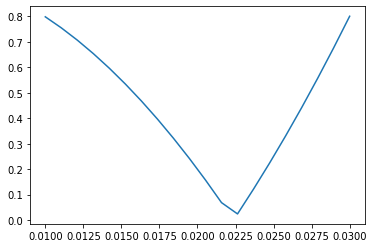

In [172]:
plt.plot(vs, es)

In [102]:
pos1_CM = (np.array([pos1]) - np.array([posCM]))[0]
xmax, xmin, ymax, ymin = findMaxPos(pos1_CM)

a = max(xmax - xmin, ymax - ymin)
b = min(xmax - xmin, ymax - ymin)

e = np.sqrt(1 - b**2/a**2)
print(f'a = {a:.3e} meter, b = {b:.3e} meter, e = {e:.3f}')

# ~1s

a = 3.281e+06 meter, b = 1.969e+06 meter, e = 0.800


### Earth-Sun system

In [ ]:
%run ./Functions_Classical_TBP.ipynb

m_1 = M_earth
m_2 = M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([-152.100e9,0.])
x_2 = np.array([0.,        0.])*R_S
v_1 = np.array([0.,   29.29e3])
v_2 = np.array([0.,        0.])*c
s = x_1, x_2, v_1, v_2, m_1, m_2

pos1, pos2, posCM, vel1, vel2, acc1, acc2 = twoOrbsNewt(s, t_max=1e8, dt=1000, DL=False)
twoOrbPlotter(pos1, pos2, posCM, CM=True, filename='Earth-Sun System', save=False, show=True, figsize=(8,8))

# ~5s

Eccentricity Check $\displaystyle e = \sqrt{1 - \frac{b^2}{a^2}}$

In [ ]:
pos1_CM = (np.array([pos1]) - np.array([posCM]))[0]
xmax, xmin, ymax, ymin = findMaxPos(pos1_CM)

a = max(xmax - xmin, ymax - ymin)
b = min(xmax - xmin, ymax - ymin)

e = np.sqrt(1 - b**2/a**2)
print(f'a = {a:.3e} meter, b = {b:.3e} meter, e = {e:.3f}')

# ~1s

We get $e_\mathrm{predicted} \approx 0.017$ which fits nicely with the expected value of $e_\mathrm{expected} \approx 0.017$.

In [ ]:
x_1 = rotate(np.array([0., 1000.]), np.pi/2)
x_2 = rotate(np.array([0., -200.]), np.pi/2)
v_1 = rotate(np.array([0.005, 0.]), np.pi/2)
v_2 = rotate(np.array([-0.01, 0.]), np.pi/2)
a_1 = np.array([0.,    0.])
a_2 = np.array([0.,    0.])
m_1 = 10
m_2 = 15

s = x_1, x_2, v_1, v_2, a_1, a_2, m_1, m_2

pos1, pos2, posCM, vel1, vel2, acc1, acc2 = twoOrbsNewt(s, t_max = 30000, dt = 0.1)
twoOrbPlotter(pos1, pos2, posCM, CM = False, filename='TB04 rest_frame', save=False, show=True)
twoOrbPlotter(pos1, pos2, posCM, CM = True, filename='TB04 CM_frame', save=False, show=True)
# prettyTwoOrbPlotter(pos1, pos2, posCM, CM = False, filename='TB04 rest_frame', save=False)
# prettyTwoOrbPlotter(pos1, pos2, posCM, CM = True, filename='TB04 CM_frame', save=False)

In [ ]:
# Defining initial states in rest frame
m_1 = 10
x_1 = np.array([500., 1000.])
v_1 = np.array([-0.01, 0.])
a_1 = np.array([0.,    0.])

m_2 = 10
x_2 = np.array([0.,-1000.])
v_2 = np.array([0.01, 0.])
a_2 = np.array([0.,    0.])

s = x_1, x_2, v_1, v_2, a_1, a_2, m_1, m_2

pos1, pos2, posCM, vel1, vel2, acc1, acc2 = twoOrbsNewt(s, t_max=100000, dt=1)
# twoOrbPlotter(pos1, pos2, posCM, filename='TB02 rest_frame', CM=False, save=False)
twoOrbPlotter(pos1, pos2, posCM, filename='TB02 CM_frame', CM=True, save=False)
# prettyTwoOrbPlotter(pos1, pos2, posCM, filename='TB02 rest_frame', CM=False, save=False)
# prettyTwoOrbPlotter(pos1, pos2, posCM, filename='TB02 CM_frame', CM=True, save=False)

In [ ]:
# Defining initial states in rest frame
m_1 = 10
x_1 = np.array([500., 1000.])
v_1 = np.array([0.025, 0.])
a_1 = np.array([0.,    0.])

m_2 = 10
x_2 = np.array([0.,-1000.])
v_2 = np.array([0.01, 0.])
a_2 = np.array([0.,    0.])

s = x_1, x_2, v_1, v_2, a_1, a_2, m_1, m_2

pos1, pos2, posCM, vel1, vel2, acc1, acc2 = twoOrbsNewt(s, t_max=300000, dt=1)
twoOrbPlotter(pos1, pos2, posCM, filename='TB03 rest_frame', CM=False)
twoOrbPlotter(pos1, pos2, posCM, filename='TB03 CM_frame', CM=True)
# prettyTwoOrbPlotter(pos1, pos2, posCM, filename='TB03 rest_frame', CM=False, save=False)
# prettyTwoOrbPlotter(pos1, pos2, posCM, filename='TB03 CM_frame', CM=True, save=False)

# ANIMATION

In [ ]:
# # This cell runs the file "Two_body_functions.ipynb" such that the functions in that file can be utillized here
# %run ./Two_body_functions.ipynb

In [ ]:
# x_1 = np.array([0., 1000.])
# x_2 = np.array([0.,-1000.])
# v_1 = np.array([0.05,  -0.01])
# v_2 = np.array([-0.05, 0.05])
# a_1 = np.array([0.,    0.])
# a_2 = np.array([0.,    0.])
# m_1 = 10
# m_2 = 15
# s = x_1, x_2, v_1, v_2, a_1, a_2, m_1, m_2

# pos1, pos2, posCM, vel1, vel2, acc1, acc2 = twoOrbsEIH(s, t_max = 450000, dt = 1)

In [ ]:
# An animation of 10s at 60 fps takes about 5  min to render
# An animation of 10s at 48 fps takes about 3½ min to render
# An animation of 10s at 24 fps takes about 1½ min to render
# An animation of 10s at 12 fps takes about ½  min to render

#twoOrbAnimator(pos1, pos2, posCM, filename='EIH3', length=10, fps=24)